# **EDA - IMÁGENES MÉDICAS (.nii)**

In [86]:
# [Config] Librerías
import pandas as pd
import os
import nibabel as nib
import re
import numpy as np
import pandas as pd
from datetime import datetime
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
# [Config] Rutas
ruta  = r"C:\Users\Hp\MACHINE\MRI\IMAGES"
df = pd.read_csv("ADNI_Images.csv")
df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'], errors='coerce')

mapa_viscode = {'bl':0, "m06": 6,"m12": 12,"m18": 18,"m24": 24, 'm30': 30, "m36": 36,'m42':42, "m48": 48, 'm54':54, 'm60':60, 'm66':66, "m60": 60}
df["VISCODE"] = df["VISCODE"].map(mapa_viscode)

def categorizar_educacion(anios):
    if anios <= 10:
        return "Primaria o menos"
    elif anios <= 12:
        return "Secundaria completa"
    elif anios <= 14:
        return "Técnico o incompleto universitario"
    elif anios <= 16:
        return "Universitario completo"
    elif anios <= 18:
        return "Posgrado corto"
    else:
        return "Posgrado avanzado"
df["PTEDUCAT"] = df["PTEDUCAT"].apply(categorizar_educacion)

## **1. Descripción del conjunto de datos**

In [88]:
# []
print("-" * 30)
print("📁 Información general:")
print(f"\nDimensión: {df.shape[0]} Imágenes disponibles × {df.shape[1]} atributos")
print(f"\nTipo de atributos: \n{df.dtypes.value_counts()}")
print("-" * 30)
print(f"👦 {df['sujeto_id'].nunique()} sujetos en estudio")

------------------------------
📁 Información general:

Dimensión: 283 Imágenes disponibles × 34 atributos

Tipo de atributos: 
float64           22
object            10
int64              1
datetime64[ns]     1
Name: count, dtype: int64
------------------------------
👦 53 sujetos en estudio


In [89]:
print("-" * 30)
print("📁 Valores nulos:")
print(f"Variables con valores nulos:")
nulos = df.isna().sum()
porcentaje = (nulos / len(df)) * 100
tabla_nulos = pd.DataFrame({
    "Variable": nulos.index,
    "Cantidad_nulos": nulos.values,
    "Porcentaje_nulos": porcentaje.round(2)
})
tabla_nulos = tabla_nulos[tabla_nulos["Cantidad_nulos"] > 0]
tabla_nulos = tabla_nulos.sort_values(by="Cantidad_nulos", ascending=False).reset_index(drop=True)
tabla_nulos

------------------------------
📁 Valores nulos:
Variables con valores nulos:


,Variable,Cantidad_nulos,Porcentaje_nulos
0,Hippocampus,67,23.67
1,MidTemp,67,23.67
2,Fusiform,67,23.67
3,Entorhinal,67,23.67
4,ICV,38,13.43
5,WholeBrain,38,13.43
6,Ventricles,38,13.43
7,FAQ,31,10.95
8,TRABSCOR,31,10.95
9,RAVLT_forgetting,30,10.60


In [90]:
# DX con valores nulos
print("-" * 30)
print("📁 DX con valores nulos:")
print(f"Registros con DX nulos: {df['DX'].isna().sum()}")
porcentaje_nulo = df["DX"].isna().mean() * 100
print(f"{porcentaje_nulo:.2f}% de los registros no tienen DX asignado.")
df_dx_nulo = df[df["DX"].isna()]
print(f"Diagnosticos nulos en las vistas: {df_dx_nulo['VISCODE'].unique()}")
print("-" * 30)
print(df_dx_nulo[["sujeto_id", "VISCODE", "EXAMDATE", "DX"]])



------------------------------
📁 DX con valores nulos:
Registros con DX nulos: 28
9.89% de los registros no tienen DX asignado.
Diagnosticos nulos en las vistas: [30]
------------------------------
      sujeto_id  VISCODE   EXAMDATE   DX
5    007_S_0101       30 2008-07-18  NaN
12   007_S_0128       30 2008-08-20  NaN
18   007_S_0249       30 2008-10-01  NaN
29   014_S_0169       30 2008-09-16  NaN
50   018_S_0142       30 2008-08-20  NaN
56   018_S_0155       30 2008-10-06  NaN
62   021_S_0141       30 2008-09-09  NaN
74   021_S_0273       30 2008-10-13  NaN
80   021_S_0276       30 2008-10-01  NaN
86   022_S_0004       30 2008-05-08  NaN
92   023_S_0042       30 2008-06-24  NaN
99   023_S_0126       30 2008-10-23  NaN
106  027_S_0116       30 2008-08-18  NaN
117  027_S_0256       30 2008-10-16  NaN
124  027_S_0307       30 2008-10-30  NaN
136  032_S_0214       30 2008-10-16  NaN
149  035_S_0204       30 2008-09-26  NaN
159  037_S_0150       30 2008-09-10  NaN
180  067_S_0176       3

## **2. Propiedades técnicas de las imágenes**

In [91]:
# [] Formato de imagen - Orientación - Tipo de dato y unidades
shape_counts = df["shape"].value_counts() #Formatos de imagen
orint_counts = df["orientation"].value_counts() #Orientación espacial

tabla_shape= pd.DataFrame({
    "Shape": shape_counts.index,
    "Imágenes": shape_counts.values
})

tabla_orientarion= pd.DataFrame({
    "Orientación": orint_counts.index,
    "Imágenes": orint_counts.values
})

print("\nFormatos de imagen:")
print(tabla_shape)

print("\nOrientación:")
print(tabla_orientarion)

print(f"\nTipos de datos {df['datatype'].unique()} \nUnidades {df['units'].unique()}") #Tipo de dato y unidades



Formatos de imagen:
             Shape  Imágenes
0  (160, 192, 192)       100
1  (166, 256, 256)        89
2  (256, 256, 170)        36
3  (180, 256, 256)        36
4  (256, 256, 184)         9
5  (170, 256, 256)         6
6  (160, 240, 256)         4
7  (176, 256, 256)         1
8  (170, 288, 288)         1
9  (162, 256, 256)         1

Orientación:
       Orientación  Imágenes
0  ('R', 'A', 'S')       238
1  ('P', 'S', 'R')        45

Tipos de datos ['int16'] 
Unidades ["('mm', 'sec')"]


In [92]:
# Resoluciones de voxel
voxel_counts = df["voxel_size"].value_counts()
volumen_counts = df["voxel_volume_mm3"].value_counts()
total_counts = df["total_volume"].value_counts()

tabla_voxel= pd.DataFrame({
    "Voxel": voxel_counts.index,
    "Imágenes": voxel_counts.values
})
tabla_volum= pd.DataFrame({
    "Volumen": volumen_counts.index,
    "Imágenes": volumen_counts.values
})
tabla_total= pd.DataFrame({
    "Volumen total": total_counts.index,
    "Imágenes": total_counts.values
})

print("\nResoluciones de voxel:")
print(tabla_voxel)
print("\nVolumen de voxel:")
print(tabla_volum)
print("\nVolumen estimado:")
print(tabla_total)


Resoluciones de voxel:
                          Voxel  Imágenes
0         (1.2, 0.9375, 0.9375)       114
1             (1.2, 1.25, 1.25)        98
2         (0.9375, 0.9375, 1.2)        43
3   (1.1998978, 0.9375, 0.9375)         6
4               (1.2, 1.0, 1.0)         4
5   (1.1996994, 0.9375, 0.9375)         3
6   (1.1996002, 0.9375, 0.9375)         3
7         (1.2, 0.9766, 0.9766)         1
8   (1.2, 0.8680556, 0.8680556)         1
9   (0.9765625, 0.9765625, 1.2)         1
10        (1.1999999, 1.0, 1.0)         1
11              (1.0, 1.0, 1.2)         1
12    (1.2, 0.976562, 0.976562)         1
13  (1.1996994, 0.9766, 0.9766)         1
14  (1.2001953, 0.9375, 0.9375)         1
15  (1.2003021, 0.9375, 0.9375)         1
16  (1.2, 1.2760416, 1.2760416)         1
17  (1.2, 1.3020834, 1.3020834)         1
18   (1.199884, 0.9375, 0.9375)         1

Volumen de voxel:
     Volumen  Imágenes
0   1.054688       157
1   1.875000        98
2   1.054598         6
3   1.200000         5
4 

Qué significa cada código?
- 'R', 'L': Right / Left (derecha / izquierda)
- 'A', 'P': Anterior / Posterior (frontal / trasera)
- 'S', 'I': Superior / Inferior (arriba / abajo)
Por ejemplo:
- ('R', 'A', 'S'): Ejes orientados hacia la derecha, adelante y arriba.
- ('P', 'S', 'R'): Ejes hacia atrás, arriba y derecha — diferente orden y dirección.


In [93]:
# Intensidad de imagen
print("Intensidad de la imagen")
print("-" * 30)
# Brillo
resumen_mean = df['mean_intensity'].describe().round(2).to_frame(name='mean_intensity')
resumen_mean.index.name = 'Brillo'
print(resumen_mean)
print("-" * 30)
# Contraste
resumen_std = df['std_intensity'].describe().round(2).to_frame(name='std_intensity')
resumen_std.index.name = 'Contraste'
print(resumen_std)

Intensidad de la imagen
------------------------------
        mean_intensity
Brillo                
count           283.00
mean          32834.60
std           71851.68
min              11.66
25%             101.73
50%             127.50
75%             275.25
max          363261.17
------------------------------
           std_intensity
Contraste               
count             283.00
mean            49299.07
std            108799.20
min                16.62
25%               132.22
50%               168.22
75%               370.67
max            579786.68


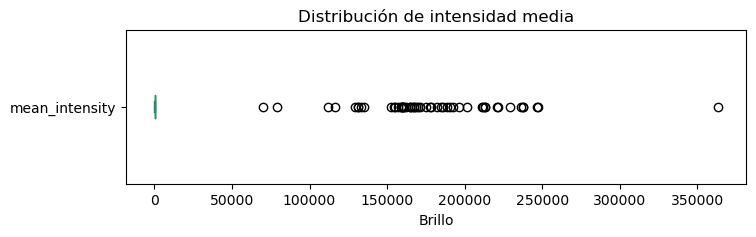

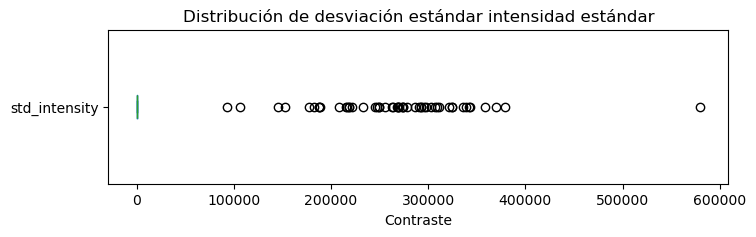

In [94]:
plt.figure(figsize=(8, 2))
df['mean_intensity'].plot.box(vert=False)
plt.title("Distribución de intensidad media")
plt.xlabel("Brillo")

plt.figure(figsize=(8, 2))
df['std_intensity'].plot.box(vert=False)
plt.title("Distribución de desviación estándar intensidad estándar")
plt.xlabel("Contraste")
plt.show()

In [95]:
# Configuración mayoritaria de las imágenes
variables = {
    "shape": df["shape"],
    "orientation": df["orientation"],
    "voxel_size": df["voxel_size"],
    "voxel_volume_mm3": df["voxel_volume_mm3"],
    "total_volume": df["total_volume"]
}

# Construir tabla resumen
resumen = []

for nombre, serie in variables.items():
    valor_frecuente = serie.value_counts().idxmax()
    cantidad_frecuente = serie.value_counts().max()
    cantidad_diferente = (serie != valor_frecuente).sum()
    
    resumen.append({
        "Variable": nombre,
        "Más frecuente": valor_frecuente,
        "Cantidad": cantidad_frecuente,
        "Diferentes": cantidad_diferente
    })

tabla_resumen = pd.DataFrame(resumen)
print(tabla_resumen)

           Variable          Más frecuente  Cantidad  Diferentes
0             shape        (160, 192, 192)       100         183
1       orientation        ('R', 'A', 'S')       238          45
2        voxel_size  (1.2, 0.9375, 0.9375)       114         169
3  voxel_volume_mm3               1.054688       157         126
4      total_volume             11059200.0        98         185


In [96]:
# Imágenes con brillo y contraste outliers
def detectar_outliers_iqr(serie, nombre_columna):
    """
    Devuelve un DataFrame con los valores outliers de una columna numérica según el método IQR.
    """
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = (serie < limite_inferior) | (serie > limite_superior)
    print(f"🔹{nombre_columna}: {outliers.sum()} outliers detectados")
    return outliers

df["outlier_mean_intensity"] = detectar_outliers_iqr(df["mean_intensity"], "mean_intensity")
df["outlier_std_intensity"] = detectar_outliers_iqr(df["std_intensity"], "std_intensity")

# Etiqueta combinada de calidad
df["calidad_intensidad"] = "ok"
df.loc[df["outlier_mean_intensity"], "calidad_intensidad"] = "outlier_media"
df.loc[df["outlier_std_intensity"], "calidad_intensidad"] = "outlier_contraste"
df.loc[df["outlier_mean_intensity"] & df["outlier_std_intensity"], "calidad_intensidad"] = "outlier_ambos"



🔹mean_intensity: 52 outliers detectados
🔹std_intensity: 52 outliers detectados


In [97]:
# Puntaje de calidad 

shape_fr = df["shape"].value_counts().idxmax()
orien_fr = df["orientation"].value_counts().idxmax()
voxel_fr = df["voxel_size"].value_counts().idxmax()
volum_fr = df["voxel_volume_mm3"].value_counts().idxmax()
total_fr = df["total_volume"].value_counts().idxmax()

# Criterios de calidad
df["fail_shape"] = df["shape"] != shape_fr
df["fail_orientation"] = df["orientation"] != orien_fr
df["fail_voxel_size"] = df["voxel_size"] != voxel_fr
df["fail_voxel_volume"] = df["voxel_volume_mm3"] != volum_fr
df["fail_total_volume"] = df["total_volume"] != total_fr

# Outliers de intensidad
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    return (serie < Q1 - 1.5 * IQR) | (serie > Q3 + 1.5 * IQR)

df["fail_mean_intensity"] = detectar_outliers_iqr(df["mean_intensity"])
df["fail_std_intensity"] = detectar_outliers_iqr(df["std_intensity"])

# Puntaje total de fallos por imagen
df["puntaje_calidad"] = (
    df["fail_shape"].astype(int) +
    df["fail_orientation"].astype(int) +
    df["fail_voxel_size"].astype(int) +
    df["fail_voxel_volume"].astype(int) +
    df["fail_total_volume"].astype(int) +
    df["fail_mean_intensity"].astype(int) +
    df["fail_std_intensity"].astype(int)
)
resumen_puntajes = df["puntaje_calidad"].value_counts().sort_index()
print(" Distribución de puntajes de calidad:")
resumen_puntajes= pd.DataFrame({
    "Puntaje": resumen_puntajes.index,
    "Imágenes": resumen_puntajes.values
})
print(resumen_puntajes)

 Distribución de puntajes de calidad:
   Puntaje  Imágenes
0        2       207
1        3         2
2        4        27
3        6        45
4        7         2


% Los puntajes de calidad indican que tan corrupta esta una imagen

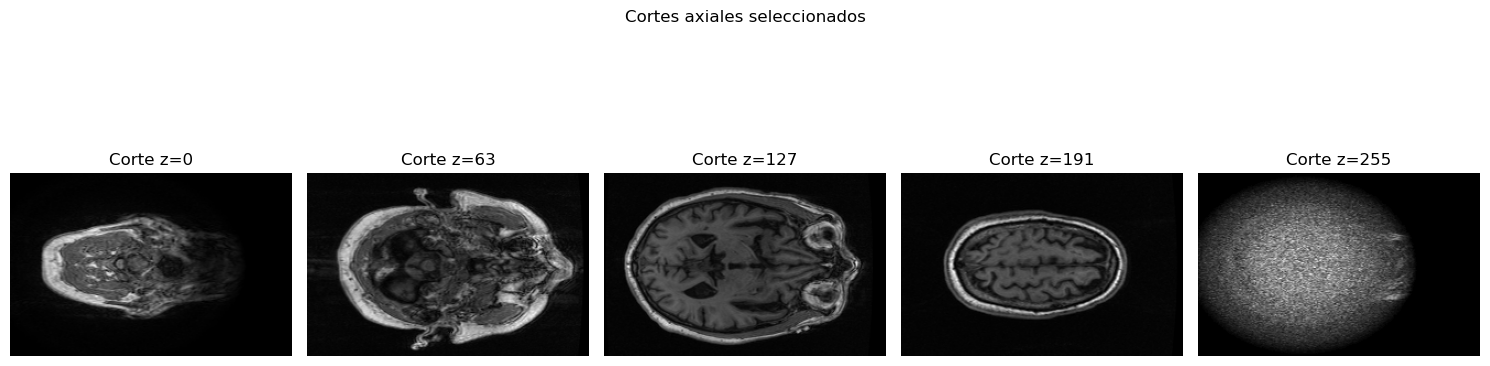

In [98]:

# Cargar imagen
img = nib.load(r"C:\Users\Hp\MACHINE\MRI\IMAGES\007_S_0101\MP-RAGE\2008-12-23_12_17_53.0\I132151\ADNI_14_M4_TS_2_2.nii")
data = img.get_fdata()

# Seleccionar 5 cortes equiespaciados en el eje axial (z)
num_cortes = 5
indices = np.linspace(0, data.shape[2] - 1, num_cortes, dtype=int)

# Mostrar los cortes
plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(1, num_cortes, i + 1)
    plt.imshow(data[:, :, idx], cmap="gray")
    plt.title(f"Corte z={idx}")
    plt.axis("off")

plt.suptitle("Cortes axiales seleccionados")
plt.tight_layout()
plt.show()


## **2. Sobre el paciente**

In [99]:
# Crear DataFrame resumen por sujeto
info_sujetos = df.groupby('sujeto_id').agg({
    'AGE': 'mean',         # Edad
    'PTGENDER': 'first',   # género
    'PTEDUCAT': 'first',   # educación
    'DX': 'last',
    'APOE4': 'first',
}).reset_index()

------------------------------
Edades de los pacientes
count    53.000000
mean     74.988679
std       7.171140
min      60.300000
25%      70.300000
50%      75.800000
75%      79.700000
max      88.300000
Name: AGE, dtype: float64


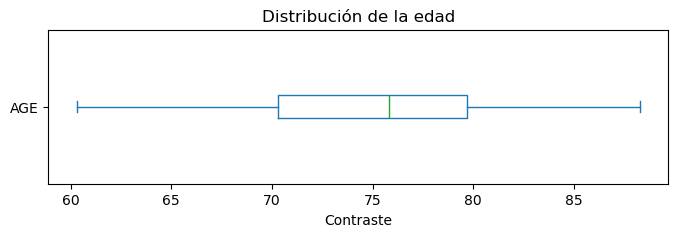

In [100]:
# EDADES
print("-"*30)
print("Edades de los pacientes")
print(info_sujetos['AGE'].describe())
plt.figure(figsize=(8, 2))
info_sujetos['AGE'].plot.box(vert=False)
plt.title("Distribución de la edad")
plt.xlabel("Contraste")
plt.show()

------------------------------
Sexo de los pacientes
          count
PTGENDER       
Male         40
Female       13


<Axes: ylabel='PTGENDER'>

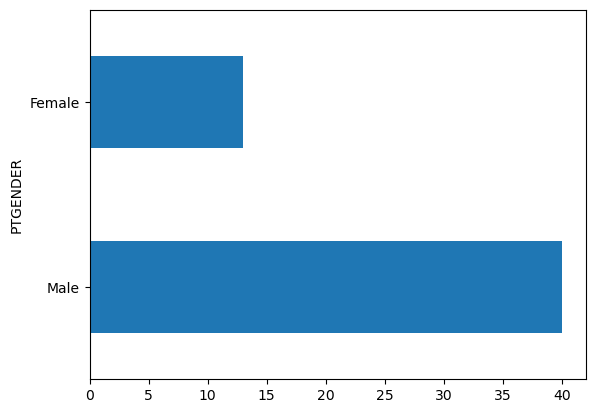

In [101]:
# SEXO
print("-"*30)
print("Sexo de los pacientes")
print(info_sujetos['PTGENDER'].value_counts().to_frame())
info_sujetos['PTGENDER'].value_counts().plot.barh()

------------------------------
Nivel educativo de los pacientes
                                    count
PTEDUCAT                                 
Universitario completo                 17
Posgrado corto                         13
Posgrado avanzado                      11
Técnico o incompleto universitario      5
Secundaria completa                     4
Primaria o menos                        3


<Axes: ylabel='PTEDUCAT'>

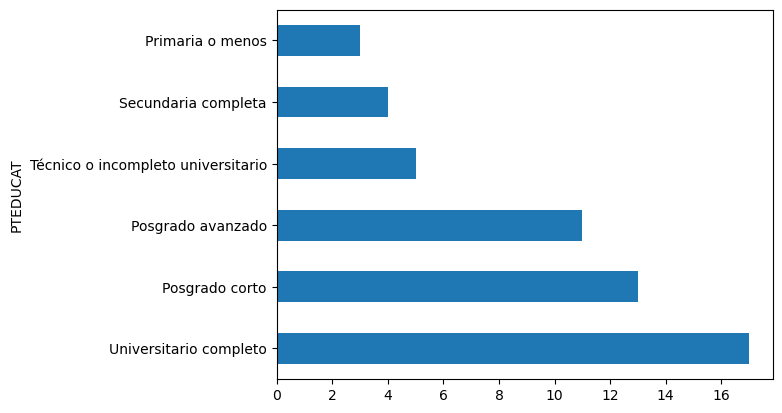

In [102]:
# Educación
print("-"*30)
print("Nivel educativo de los pacientes")
print(info_sujetos['PTEDUCAT'].value_counts().to_frame())
info_sujetos['PTEDUCAT'].value_counts().plot.barh()

------------------------------
Genotipo APOE4
       count
APOE4       
0.0       24
1.0       23
2.0        6


<Axes: ylabel='APOE4'>

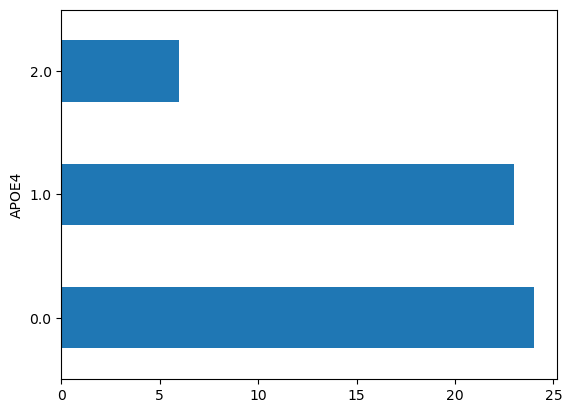

In [103]:
# Educación
print("-"*30)
print("Genotipo APOE4")
print(info_sujetos['APOE4'].value_counts().to_frame())
info_sujetos['APOE4'].value_counts().plot.barh()

------------------------------
Genotipo DX
          count
DX             
MCI          31
Dementia     22


<Axes: ylabel='DX'>

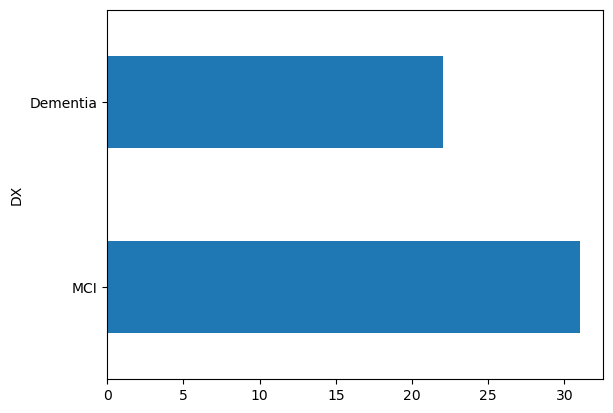

In [104]:
# Diagnóstico final
print("-"*30)
print("Genotipo DX")
print(info_sujetos['DX'].value_counts().to_frame())
info_sujetos['DX'].value_counts().plot.barh()

% mejorar graficos  e interpretacion

                count
duracion_anios       
0                   2
1                  12
2                  22
3                  16
4                   1


<Axes: ylabel='duracion_anios'>

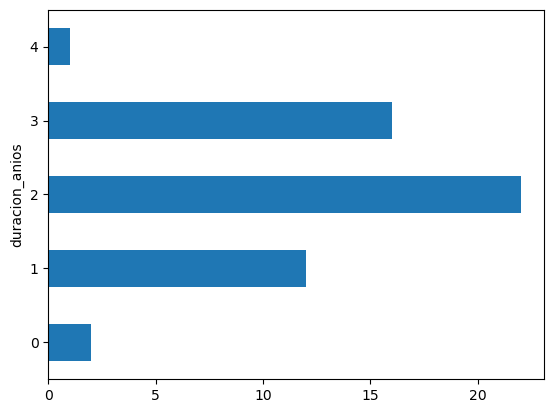

In [105]:
df["EXAMDATE"] = pd.to_datetime(df["EXAMDATE"])
df["año"] = df["EXAMDATE"].dt.year
df_duracion = df.sort_values(["sujeto_id", "EXAMDATE"]).groupby("sujeto_id").agg(
    año_inicio=("año", "first"),
    año_final=("año", "last")
).reset_index()

df_duracion["duracion_anios"] = df_duracion["año_final"] - df_duracion["año_inicio"]
print(df_duracion["duracion_anios"].value_counts().sort_index().to_frame())

df_duracion["duracion_anios"].value_counts().sort_index().plot.barh()

## **3. Progresión clínica**

   Vistas  Pacientes
0       2          2
1       3          6
2       4          7
3       5         10
4       6         13
5       7         15
Resumen de número de visitas por paciente:


Text(0, 0.5, 'Frecuencia')

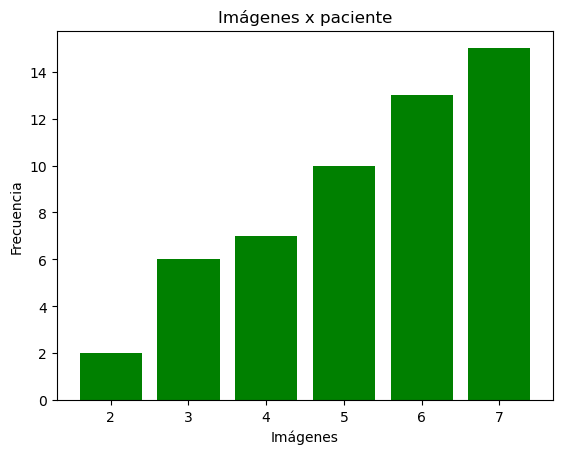

In [106]:
# Vistas por pacientes
tabla_visitas = (
    df
    .assign(valor="O")  # marcamos presencia
    .pivot_table(index="sujeto_id", columns="VISCODE", values="valor", aggfunc="first", fill_value="X")
    .sort_index(axis=1)
)
tabla_visitas
conteo_visitas = (tabla_visitas == "O").sum(axis=1)
resumen_visitas = conteo_visitas.value_counts().sort_index()
tabla_resumen = pd.DataFrame({
    "Vistas": resumen_visitas.index,
    "Pacientes": resumen_visitas.values
})
print(tabla_resumen)
print("Resumen de número de visitas por paciente:")
plt.bar(tabla_resumen["Vistas"], tabla_resumen["Pacientes"], color='green')
plt.title("Imágenes x paciente")
plt.xlabel("Imágenes")
plt.ylabel("Frecuencia")

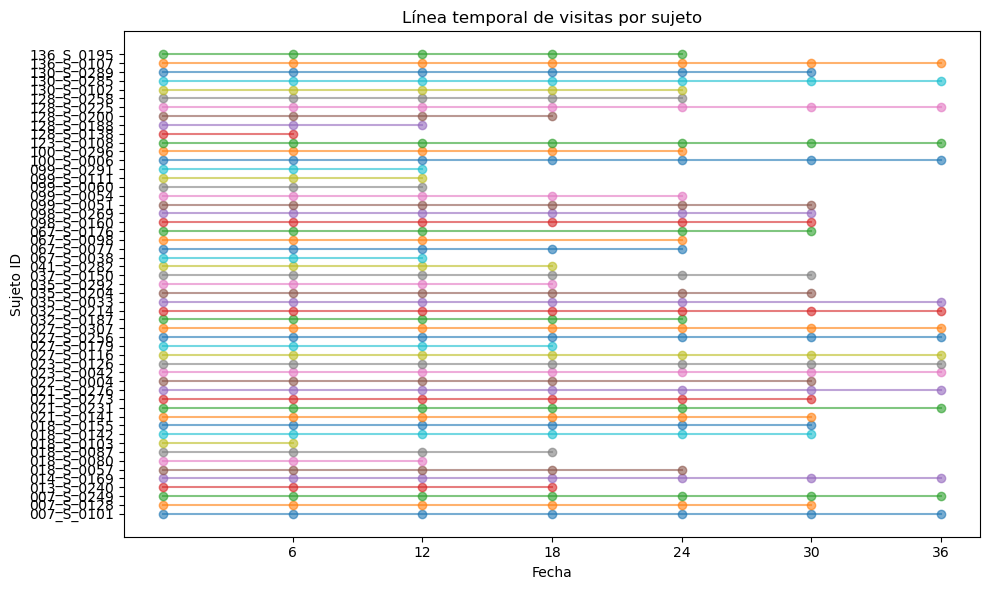

In [120]:
# Linea de vistas por sujeto
plt.figure(figsize=(10,6))
for sid, grupo in df.groupby('sujeto_id'):
    plt.plot(grupo['VISCODE'], [sid]*len(grupo), marker='o', linestyle='-', alpha=0.6)
plt.title('Línea temporal de visitas por sujeto')
plt.xticks(ticks=range(6, 37, 6))
plt.xlabel('Fecha')
plt.ylabel('Sujeto ID')
plt.tight_layout()
plt.show()


% Grafico importantisimo

         count
VISCODE       
0           53
6           53
12          51
18          43
24          38
30          28
36          17


<Axes: ylabel='VISCODE'>

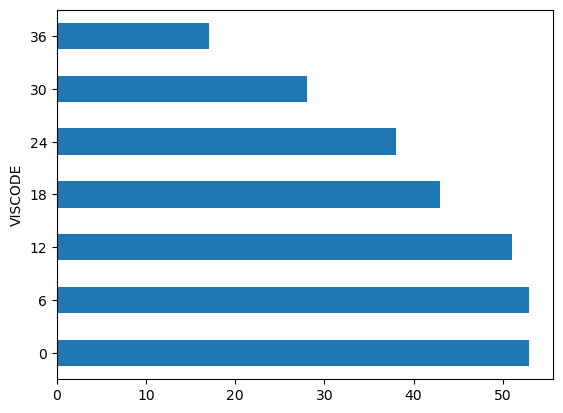

In [108]:
print(df["VISCODE"].value_counts().sort_index().to_frame())
df['VISCODE'].value_counts().sort_index().plot.barh()

* Variables sobre el estado cognitivo
% Buscar que significa cada cosa

In [109]:
# Variables cognitivas
info_cognitiva = df.groupby('sujeto_id').agg({
    'CDRSB': ['min', 'mean', 'max'],
    'MMSE': ['min', 'mean', 'max'],
    'ADAS13': ['min', 'mean', 'max'],
    'FAQ': ['min', 'mean', 'max'],
    'RAVLT_immediate':['min', 'mean', 'max'],
    'RAVLT_learning': ['min', 'mean', 'max'],
    'RAVLT_forgetting': ['min', 'mean', 'max'],
    'DIGITSCOR': ['min', 'mean', 'max'],
    'TRABSCOR': ['min', 'mean', 'max'],
}).reset_index()


C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


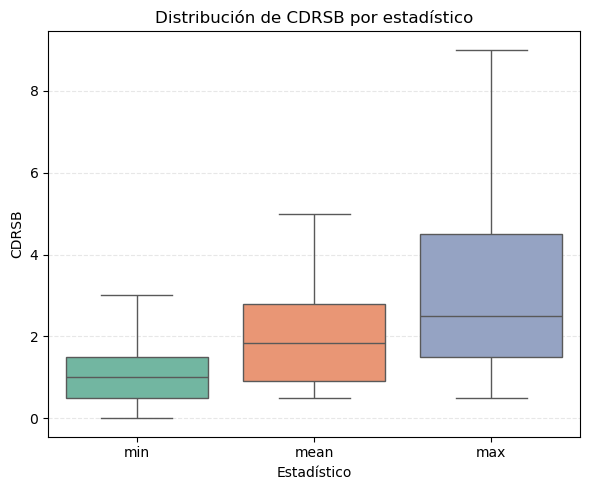

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


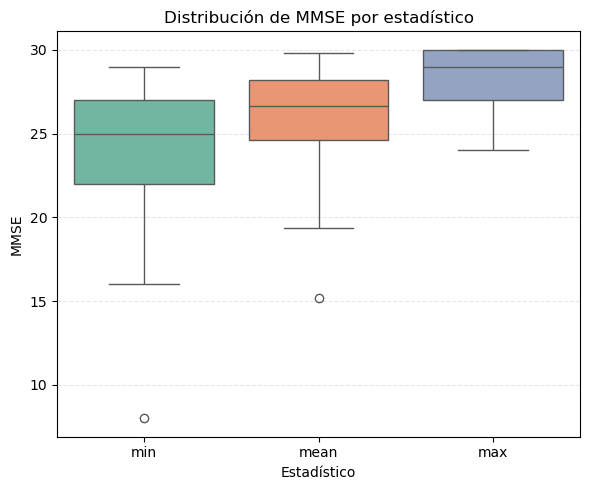

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


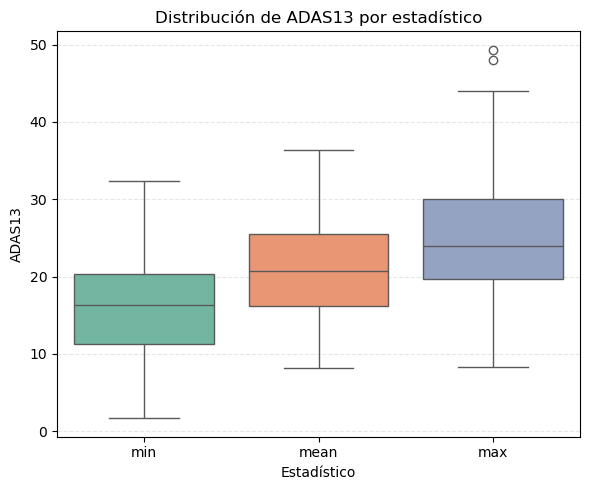

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


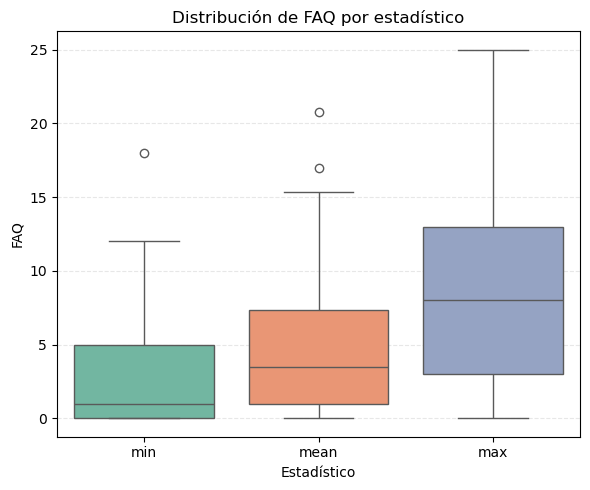

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


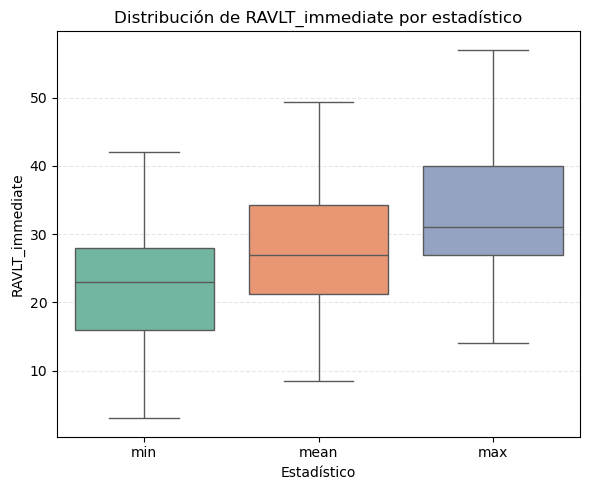

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


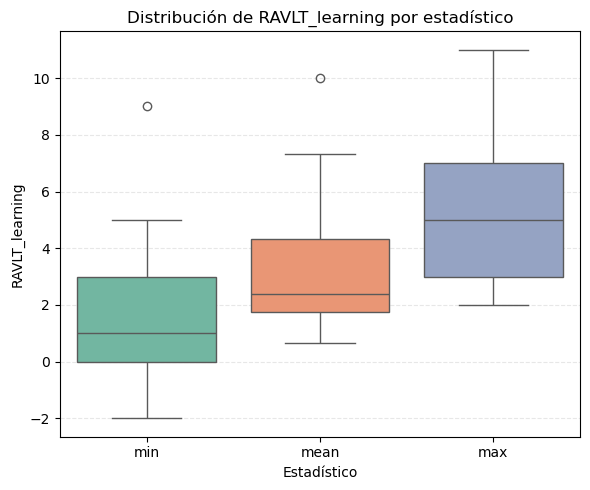

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


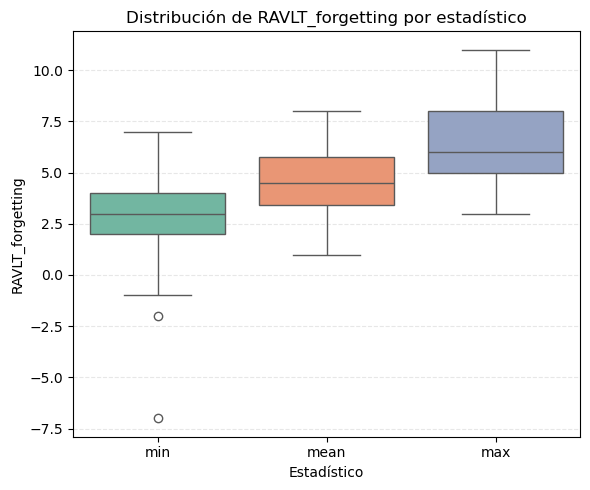

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


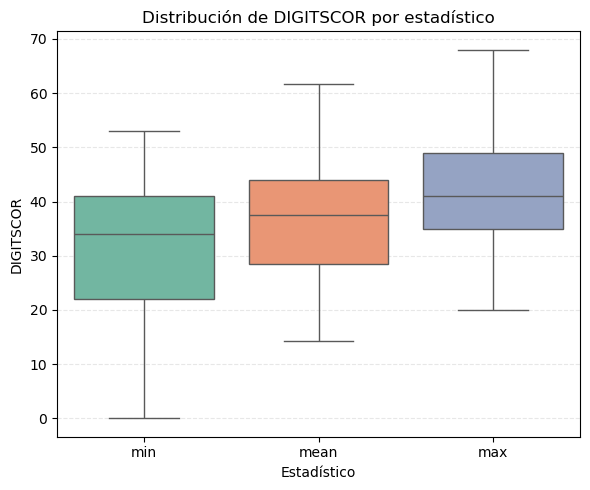

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\2176027057.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


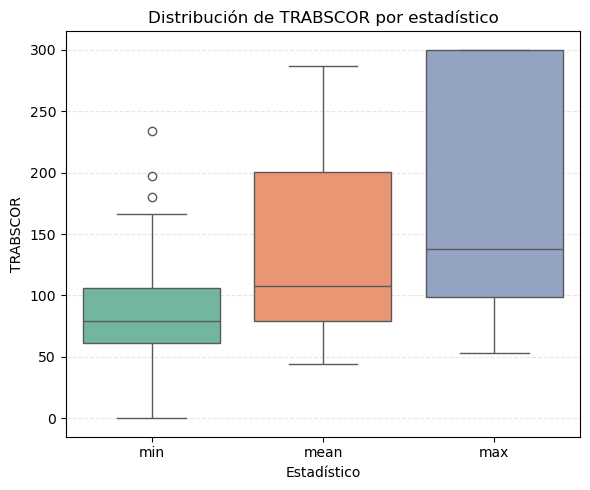

In [110]:
# Aplanar columnas
info_cognitiva.columns = ['sujeto_id'] + [f"{var}_{stat}" for var, stat in info_cognitiva.columns[1:]]

# Convertir a formato largo
info_long = pd.melt(
    info_cognitiva,
    id_vars="sujeto_id",
    var_name="variable_estadistica",
    value_name="valor"
)

# Separar nombre de variable y tipo de estadístico
info_long[["variable", "estadistica"]] = info_long["variable_estadistica"].str.rsplit("_", n=1, expand=True)

variables = info_long["variable"].unique()

for var in variables:
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=info_long[info_long["variable"] == var],
        x="estadistica",
        y="valor",
        palette="Set2"
    )
    plt.title(f"Distribución de {var} por estadístico")
    plt.xlabel("Estadístico")
    plt.ylabel(var)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

In [111]:
# Agrupar por variable y estadístico
tabla_resumen = info_long.groupby(["variable", "estadistica"])["valor"].agg(["min", "mean", "max"]).round(2).reset_index()
# Ordenar por variable y tipo de estadístico
tabla_resumen = tabla_resumen.sort_values(["variable", "estadistica"])

# Mostrar
tabla_resumen

,variable,estadistica,min,mean,max
0,ADAS13,max,8.33,25.33,49.33
1,ADAS13,mean,8.16,20.77,36.40
2,ADAS13,min,1.67,16.31,32.33
3,CDRSB,max,0.50,2.99,9.00
4,CDRSB,mean,0.50,1.97,5.00
5,CDRSB,min,0.00,1.05,3.00
6,DIGITSCOR,max,20.00,41.96,68.00
7,DIGITSCOR,mean,14.20,37.01,61.67
8,DIGITSCOR,min,0.00,31.09,53.00
9,FAQ,max,0.00,8.49,25.00


* Variables sobre le volumen MRI

In [112]:
# Variables de de Volúmenes MRI
info_volumen = df.groupby('sujeto_id').agg({
    'Ventricles' : ['min', 'mean', 'max'],
    'Hippocampus': ['min', 'mean', 'max'],
    'WholeBrain': ['min', 'mean', 'max'], 
    'Entorhinal': ['min', 'mean', 'max'],
    'Fusiform': ['min', 'mean', 'max'],
    'MidTemp': ['min', 'mean', 'max'],
    'ICV': ['min', 'mean', 'max']
}).reset_index()

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


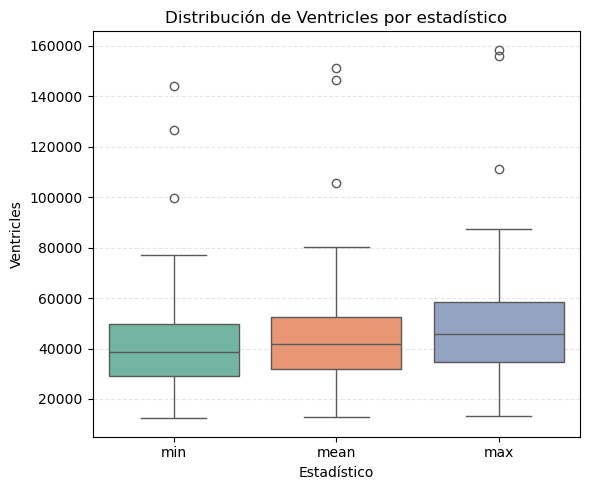

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


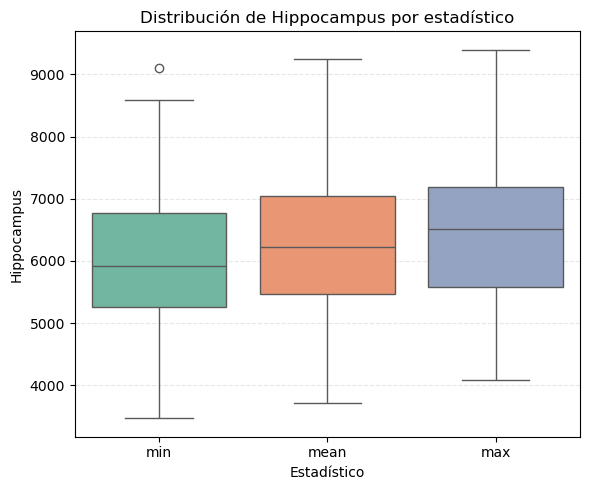

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


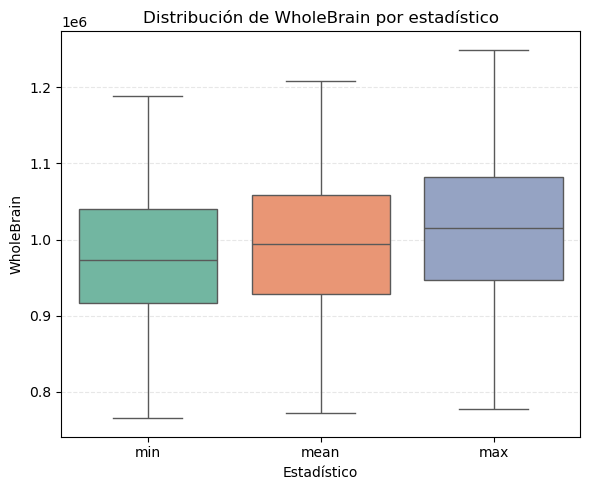

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


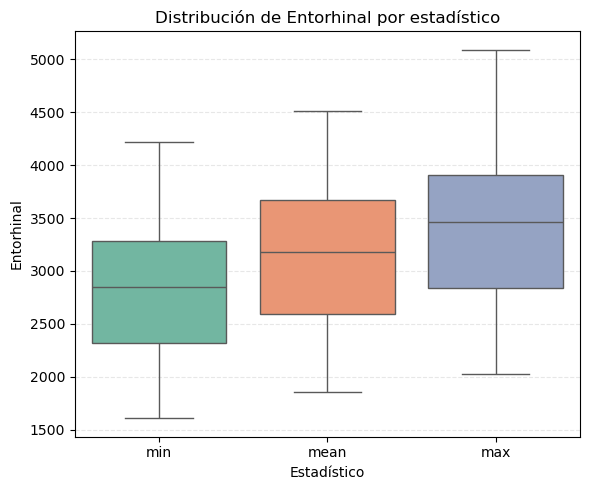

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


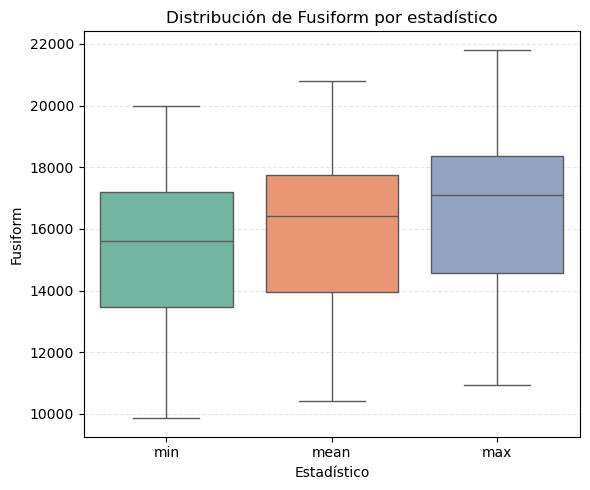

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


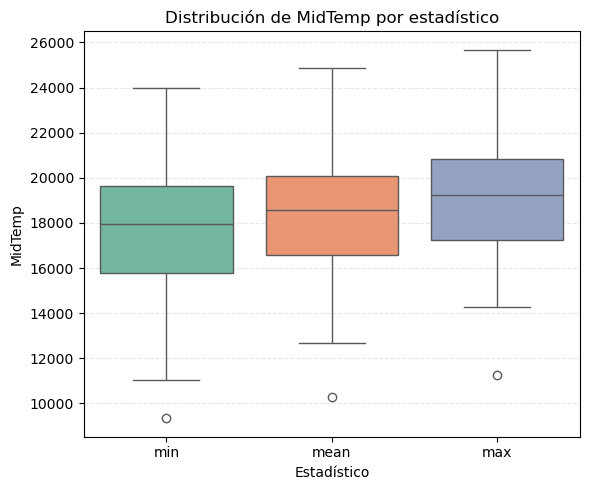

C:\Users\Hp\AppData\Local\Temp\ipykernel_18960\1002387156.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


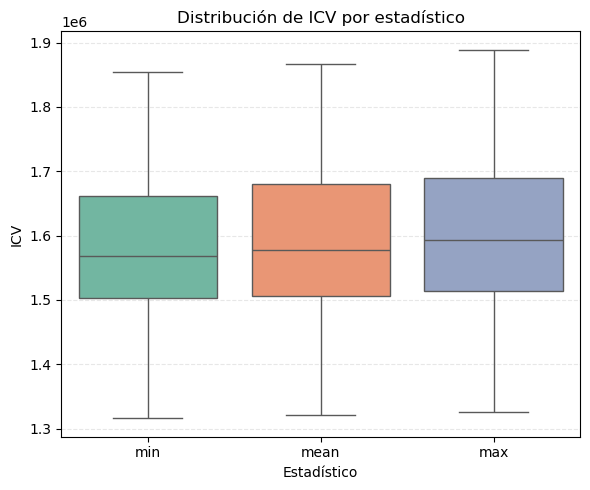

In [113]:
# Aplanar columnas
info_volumen.columns = ['sujeto_id'] + [f"{var}_{stat}" for var, stat in info_volumen.columns[1:]]

# Convertir a formato largo
info_long = pd.melt(
    info_volumen,
    id_vars="sujeto_id",
    var_name="variable_estadistica",
    value_name="valor"
)

# Separar nombre de variable y tipo de estadístico
info_long[["variable", "estadistica"]] = info_long["variable_estadistica"].str.rsplit("_", n=1, expand=True)

variables = info_long["variable"].unique()

for var in variables:
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=info_long[info_long["variable"] == var],
        x="estadistica",
        y="valor",
        palette="Set2"
    )
    plt.title(f"Distribución de {var} por estadístico")
    plt.xlabel("Estadístico")
    plt.ylabel(var)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

In [114]:
# Agrupar por variable y estadístico
tabla_resumen = info_long.groupby(["variable", "estadistica"])["valor"].agg(["min", "mean", "max"]).round(2).reset_index()
# Ordenar por variable y tipo de estadístico
tabla_resumen = tabla_resumen.sort_values(["variable", "estadistica"])

# Mostrar
tabla_resumen

,variable,estadistica,min,mean,max
0,Entorhinal,max,2023.00,3476.96,5090.0
1,Entorhinal,mean,1853.00,3160.20,4511.2
2,Entorhinal,min,1608.00,2843.06,4215.0
3,Fusiform,max,10946.00,16755.08,21808.0
4,Fusiform,mean,10424.33,16076.55,20798.8
5,Fusiform,min,9860.00,15384.26,19972.0
6,Hippocampus,max,4087.00,6445.26,9396.0
7,Hippocampus,mean,3717.67,6223.41,9251.5
8,Hippocampus,min,3471.00,6018.85,9102.0
9,ICV,max,1325720.00,1601931.13,1888900.0


* Dx inicial vrs DX final

In [115]:
df_dx = df.sort_values(["sujeto_id", "VISCODE"]).groupby("sujeto_id").agg(
    dx_inicio=("DX", "first"),
    dx_final=("DX", "last")
).reset_index()
tabla_transicion = df_dx.groupby(["dx_inicio", "dx_final"]).size().unstack(fill_value=0)
tabla_transicion

dx_final,Dementia,MCI
dx_inicio,,
MCI,22,31


## Binarias

In [116]:
df_final = df.sort_values(["sujeto_id", "VISCODE"]).groupby("sujeto_id").agg(
    edad_final=("AGE", "last"),
    dx_final=("DX", "last")
).reset_index()
tabla_edad_dx = df_final.groupby("dx_final")["edad_final"].describe().round(1)
tabla_edad_dx


,count,mean,std,min,25%,50%,75%,max
dx_final,,,,,,,,
Dementia,22.0,74.2,6.8,60.3,70.4,74.7,79.2,88.3
MCI,31.0,75.6,7.5,60.7,70.6,76.4,80.8,87.3


* Valores COGNI x VISCODE

In [117]:
df.groupby(["VISCODE"]).mean(numeric_only=True)[[ 'CDRSB', 'MMSE', 'ADAS13', 'FAQ', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'DIGITSCOR', 'TRABSCOR']]


,CDRSB,MMSE,ADAS13,FAQ,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,DIGITSCOR,TRABSCOR
VISCODE,,,,,,,,,
0,1.235849,27.301887,19.012830,3.403846,29.849057,3.849057,4.886792,37.641509,120.538462
6,1.669811,26.320755,19.725000,4.471698,27.924528,3.320755,4.415094,38.339623,121.529412
12,1.941176,26.333333,20.157451,5.360000,28.627451,3.235294,4.490196,36.901961,135.843137
18,2.348837,25.581395,22.200930,6.116279,27.714286,2.714286,4.476190,37.069767,137.465116
24,2.837838,24.815789,23.491842,7.837838,26.447368,2.552632,4.736842,35.289474,160.684211
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2.812500,25.647059,21.372353,7.235294,27.529412,3.352941,4.687500,38.562500,151.176471


* Valores VOLUMEN x VISCODE

In [118]:
df.groupby(["VISCODE"]).mean(numeric_only=True)[[ 'Ventricles',
       'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp',
       'ICV']]

,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV
VISCODE,,,,,,,
0,44603.924528,6426.183673,1.004679e+06,3312.061224,16581.857143,19070.979592,1.588878e+06
6,46260.392157,6214.066667,9.969694e+05,3150.311111,16332.533333,18661.577778,1.591580e+06
12,45051.313725,6266.659091,9.957942e+05,3211.750000,16089.818182,18337.409091,1.585502e+06
18,48546.780488,6185.184211,9.920210e+05,3090.815789,16028.815789,17961.078947,1.587287e+06
24,49118.617647,5985.392857,9.839078e+05,3093.571429,15676.285714,18249.607143,1.592065e+06
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,43194.400000,6010.833333,9.965634e+05,3006.333333,15955.166667,18281.166667,1.589993e+06


## Evolución por visita

In [119]:
tabla_dx = df.pivot_table(
    index="sujeto_id",
    columns="VISCODE",
    values="DX",
    aggfunc="first"  # Asume que hay una sola entrada por sujeto-visita
).fillna("-") 
tabla_dx

VISCODE,0,6,12,18,24,36
sujeto_id,,,,,,
007_S_0101,MCI,MCI,MCI,MCI,Dementia,Dementia
007_S_0128,MCI,MCI,MCI,Dementia,Dementia,-
007_S_0249,MCI,MCI,Dementia,Dementia,Dementia,Dementia
013_S_0240,MCI,MCI,MCI,Dementia,-,-
014_S_0169,MCI,MCI,MCI,MCI,MCI,MCI
018_S_0057,MCI,MCI,MCI,Dementia,Dementia,-
018_S_0080,MCI,MCI,MCI,-,-,-
018_S_0087,MCI,MCI,MCI,MCI,-,-
018_S_0103,MCI,MCI,-,-,-,-
